<a href="https://colab.research.google.com/github/brindhamariappan/brindha_m_zeotap/blob/main/brindha_m_Lookalike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customers = pd.read_csv('/content/drive/MyDrive/Dataset/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Dataset/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Dataset/Transactions.csv')

In [4]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [5]:
features = data.groupby('CustomerID').agg({'TotalValue': 'sum', 'ProductID': 'nunique'})

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [8]:
similarity_matrix = cosine_similarity(features_scaled)

In [9]:
recommendations = {}
for i, customer_id in enumerate(features.index):
    # Find top 3 similar customers (excluding the customer itself)
    similar_customers = sorted(
        list(enumerate(similarity_matrix[i])),
        key=lambda x: x[1],
        reverse=True
    )[1:4]
    recommendations[customer_id] = [(features.index[idx], score) for idx, score in similar_customers]

In [12]:
with open('Lookalike.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['CustomerID', 'Lookalikes'])
    for customer_id, lookalikes in recommendations.items():
        writer.writerow([customer_id, lookalikes])

print("Lookalike.csv has been successfully generated.")

Lookalike.csv has been successfully generated.


In [17]:
import csv
with open('Lookalike.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['CustomerID', 'Lookalikes'])
    for customer_id, lookalikes in recommendations.items():
        writer.writerow([customer_id,lookalikes])

In [18]:
lookalike = pd.read_csv('/content/Lookalike.csv')

In [19]:
lookalike_df = pd.read_csv('Lookalike.csv')

In [23]:
G = nx.Graph()

In [24]:
for _, row in lookalike_df.iterrows():
    customer_id = row['CustomerID']
    lookalikes = eval(row['Lookalikes'])  # Convert string representation of list back to list
    G.add_node(customer_id)  # Add customer node
    for lookalike_id, score in lookalikes:
        G.add_node(lookalike_id)  # Add lookalike node
        G.add_edge(customer_id, lookalike_id, weight=score)

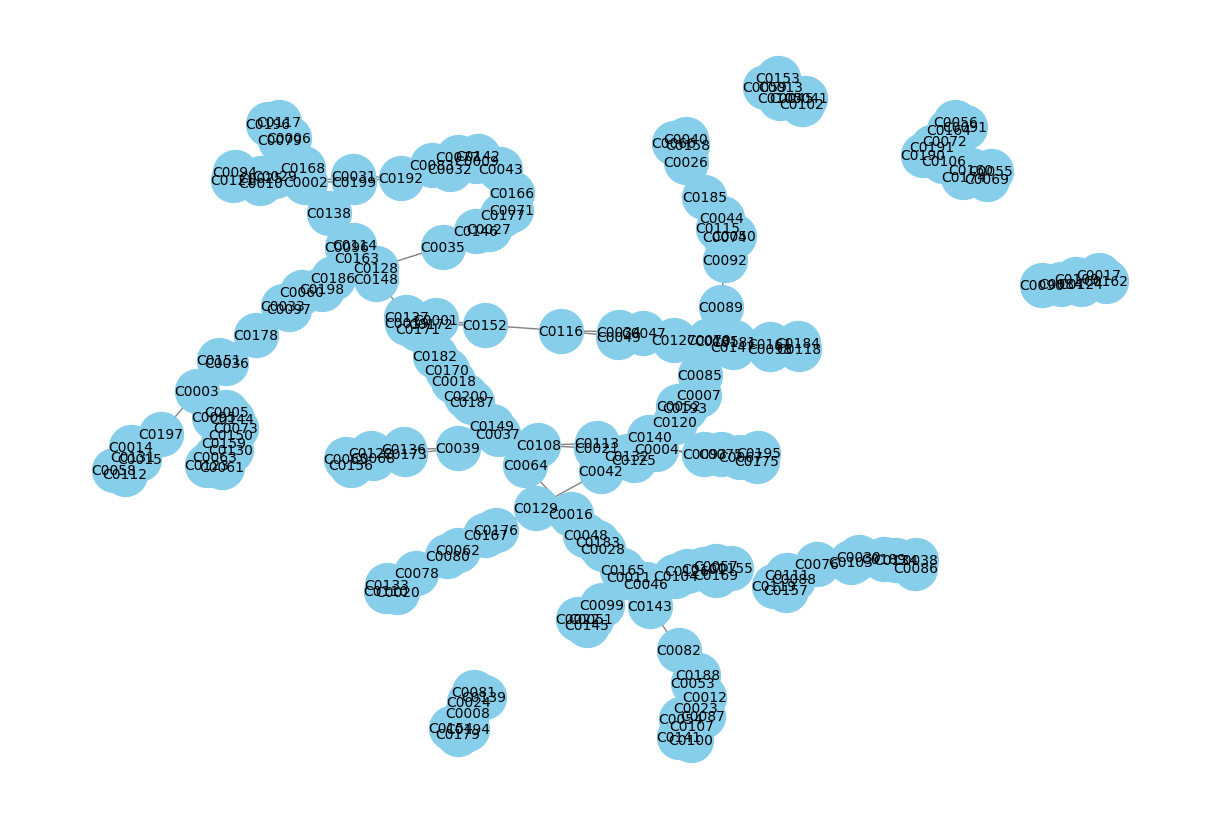

In [27]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Generate positions for nodes
nx.draw(
    G, pos, with_labels=True, node_color="skyblue", node_size=1000, edge_color="gray", font_size=10
)


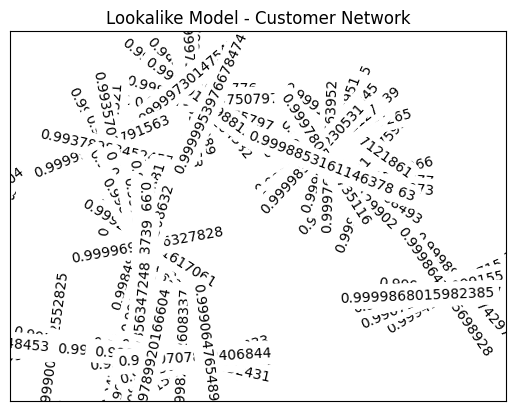

In [28]:
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Lookalike Model - Customer Network")
plt.show()

Give the top 3 lookalikes with there similarity scores for the first 20 customers (CustomerID: C0001 - C0020)  in Customers.csv. Form an “Lookalike.csv” which has just one map: Map<cust_id, List<cust_id, score>>   


In [29]:
features = data.groupby("CustomerID").agg(
    total_spending=("TotalValue", "sum"),
    unique_products=("ProductID", "nunique"),
    avg_product_price=("TotalValue", "mean"),
)


In [30]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [31]:
similarity_matrix = cosine_similarity(features_scaled)

In [32]:
similarity_df = pd.DataFrame(similarity_matrix, index=features.index, columns=features.index)


In [33]:
recommendations = {}
target_customers = features.index[:20]  # First 20 customers (C0001 - C0020)

for customer_id in target_customers:
    # Get top 3 most similar customers (excluding self)
    similar_customers = (
        similarity_df[customer_id]
        .sort_values(ascending=False)[1:4]
        .reset_index()
        .values.tolist()
    )
    recommendations[customer_id] = similar_customers

In [34]:
with open("Lookalike.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["cust_id", "lookalikes"])
    for cust_id, lookalikes in recommendations.items():
        writer.writerow([cust_id, lookalikes])

print("Lookalike.csv has been successfully generated!")

Lookalike.csv has been successfully generated!
